# 深度学习

## 多层感知机

In [1]:
from keras.models import Sequential
model = Sequential()

In [2]:
from keras.layers import Dense
model.add(Dense(units=3,activation='sigmoid',input_dim=3))
model.add(Dense(units=1,activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week7/data.csv')
data.head()

,x1,x2,y
0,0.0323,0.0244,1
1,0.0887,0.0244,1
2,0.1690,0.0163,1
3,0.2420,0.0000,1
4,0.2420,0.0488,1


In [6]:
X=data.drop(['y'],axis=1)
y = data.loc[:,'y']
X.head()

,x1,x2
0,0.0323,0.0244
1,0.0887,0.0244
2,0.1690,0.0163
3,0.2420,0.0000
4,0.2420,0.0488


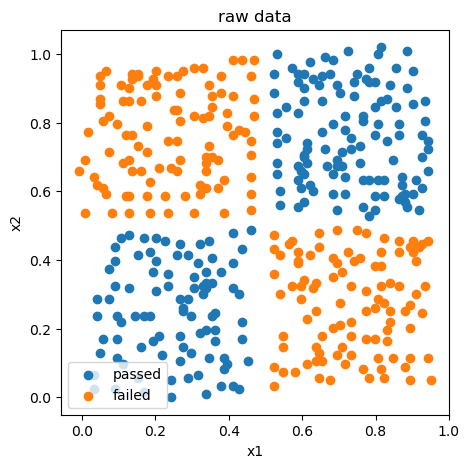

In [7]:
fig1 = plt.figure(figsize=(5,5))
passed = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
failed = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((passed,failed),('passed','failed'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)
print(X_train.shape,X_test.shape)

(275, 2) (136, 2)


In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation

mlp = Sequential()
mlp.add(Dense(units=20,input_dim=2,activation='sigmoid'))
mlp.add(Dense(units=1,activation='sigmoid'))
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                60        
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [10]:
mlp.compile(optimizer='adam',loss='binary_crossentropy')

In [31]:
mlp.fit(X_train,y_train,epochs=5000)

Epoch 1/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.2006
Epoch 2/5000
9/9 [==============================] - 0s 2ms/step - loss: 0.2004
Epoch 3/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.2003
Epoch 4/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.2003
Epoch 5/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.2001
Epoch 6/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.2001
Epoch 7/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.1998
Epoch 8/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.1997
Epoch 9/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.1998
Epoch 10/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.1996
Epoch 11/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.1996
Epoch 12/5000
9/9 [==============================] - 0s 1ms/step - loss: 0.1994
Epoch 13/5000
9/9 [==============================

In [37]:
y_train_predict = mlp.predict(X_train)
y_train_predict = np.round(y_train_predict).astype(int)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

y_test_predict = mlp.predict(X_test)
y_test_predict = np.round(y_test_predict).astype(int)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

9/9 [==============================] - 0s 1ms/step
0.9927272727272727
5/5 [==============================] - 0s 1ms/step
1.0


In [38]:
y_train_predict_form = pd.Series(i[0] for i in y_train_predict)
y_train_predict_form

0      1
1      0
2      0
3      0
4      1
      ..
270    0
271    0
272    1
273    1
274    0
Length: 275, dtype: int32

In [39]:
xx,yy = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
x_range = np.c_[xx.ravel(),yy.ravel()]
y_range_predict = mlp.predict(x_range)
y_range_predict = np.round(y_range_predict).astype(int)

313/313 [==============================] - 0s 660us/step


In [40]:
y_range_predict_form = pd.Series(i[0] for i in y_range_predict)

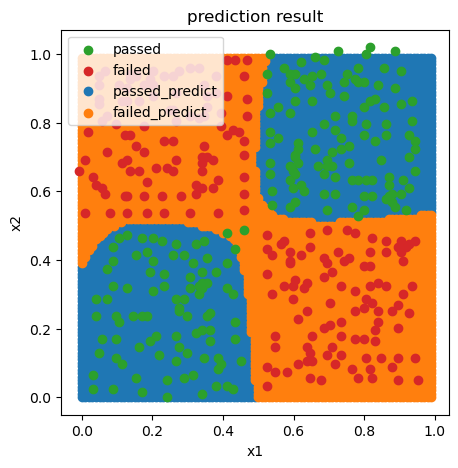

In [41]:
fig2 = plt.figure(figsize=(5,5))
passed_predict=plt.scatter(x_range[:,0][y_range_predict_form==1],x_range[:,1][y_range_predict_form==1])
failed_predict=plt.scatter(x_range[:,0][y_range_predict_form==0],x_range[:,1][y_range_predict_form==0])

passed=plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
failed=plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((passed,failed,passed_predict,failed_predict),('passed','failed','passed_predict','failed_predict'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('prediction result')
plt.show()

## MLP实现图像多分类

In [42]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 150s 13us/step


In [43]:
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


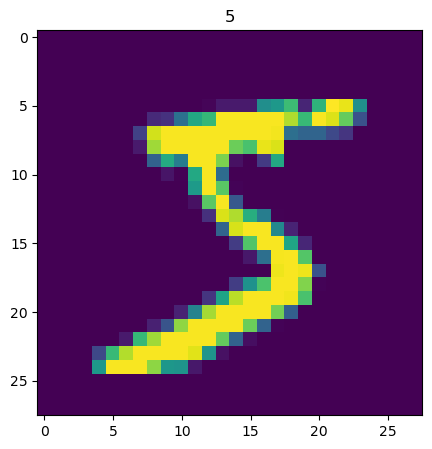

In [44]:
img1 = X_train[0]
fig1 = plt.figure(figsize=(5,5))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [45]:
img1.shape

(28, 28)

In [47]:
feature_size = img1.shape[0] * img1.shape[1]
print(feature_size)
X_train_format = X_train.reshape(X_train.shape[0],feature_size)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)
print(X_train_format.shape)

784
(60000, 784)


In [48]:
X_train_normal = X_train_format / 255
X_test_normal = X_test_format /255

In [55]:
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train[0],y_train_format[0])
print(y_train.shape)
print(y_train_format.shape)

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000,)
(60000, 10)


In [56]:
from keras.models import Sequential
from keras.layers import Dense,Activation

mlp = Sequential()
mlp.add(Dense(units=392,activation='relu',input_dim=784))
mlp.add(Dense(units=392,activation='relu'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 392)               307720    
                                                                 
 dense_5 (Dense)             (None, 392)               154056    
                                                                 
 dense_6 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [57]:
#configure the model
mlp.compile(loss='categorical_crossentropy',optimizer='adam')

In [58]:
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1878
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0833
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0548
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0407
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0353
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0289
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0241
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0234
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0196
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0192


In [68]:
y_train_predict = mlp.predict(X_train_normal)
y_train_predict = np.argmax(y_train_predict,axis=1)
accuracy_score(y_train,y_train_predict)

1875/1875 [==============================] - 3s 2ms/step


0.9961333333333333

In [69]:
y_test_predict = mlp.predict(X_test_normal)
y_test_predict = np.argmax(y_test_predict,axis=1)
accuracy_score(y_test,y_test_predict)

313/313 [==============================] - 1s 2ms/step


0.9799

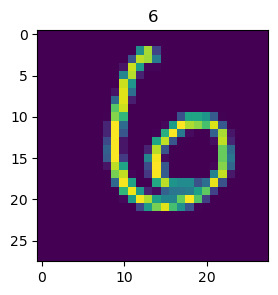

In [70]:
img2 = X_test[100]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[100])
plt.show()